# 回归模型演示
使用梯度下降找到心心念念的两个参数 w 和 b
### 引入相关库，为演示做好准备

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
# matplotlib没有中文字体，动态解决
plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

### 导入数据

In [8]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
print(X,Y)

[[-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 ...
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]] [[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]]


### 计算损失函数

In [9]:
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

### 计算b和w的偏微分 

In [20]:
# linear regression
b = -120
w = -4
# b=-2
# w=0.01
lr = 0.000005
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d  +b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # update param
    b -= lr * grad_b
    w -= lr * grad_w
    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间",end-start,"S")

Step 0, w: 1.6534, b: -119.9839, Loss: 3670819.0000
Step 10000, w: 2.4781, b: -121.8628, Loss: 11428.6652
Step 20000, w: 2.4834, b: -123.6924, Loss: 11361.7161
Step 30000, w: 2.4885, b: -125.4716, Loss: 11298.3964
Step 40000, w: 2.4935, b: -127.2020, Loss: 11238.5092
Step 50000, w: 2.4983, b: -128.8848, Loss: 11181.8685
Step 60000, w: 2.5030, b: -130.5213, Loss: 11128.2983
Step 70000, w: 2.5076, b: -132.1129, Loss: 11077.6321
Step 80000, w: 2.5120, b: -133.6607, Loss: 11029.7126
Step 90000, w: 2.5164, b: -135.1660, Loss: 10984.3908
Step 100000, w: 2.5206, b: -136.6300, Loss: 10941.5259
Step 110000, w: 2.5247, b: -138.0536, Loss: 10900.9847
Step 120000, w: 2.5287, b: -139.4382, Loss: 10862.6412
Step 130000, w: 2.5325, b: -140.7847, Loss: 10826.3764
Step 140000, w: 2.5363, b: -142.0942, Loss: 10792.0774
Step 150000, w: 2.5399, b: -143.3678, Loss: 10759.6379
Step 160000, w: 2.5435, b: -144.6063, Loss: 10728.9568
Step 170000, w: 2.5470, b: -145.8108, Loss: 10699.9390
Step 180000, w: 2.5503

### 可视化结果

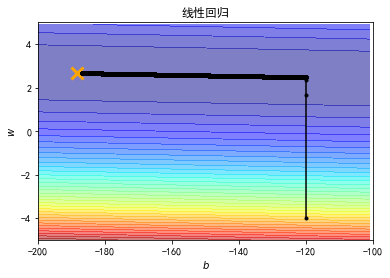

In [22]:
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")
plt.show()